In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

churn = pd.read_csv('data/churn.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

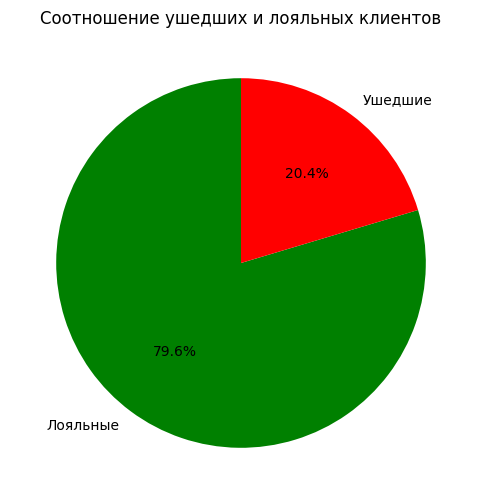

In [ ]:
churn_counts = churn['Exited'].value_counts()
churn_labels = ['Лояльные', 'Ушедшие']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

Комментарий:
Примерно 80% клиентов остались, а 20% ушли


## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

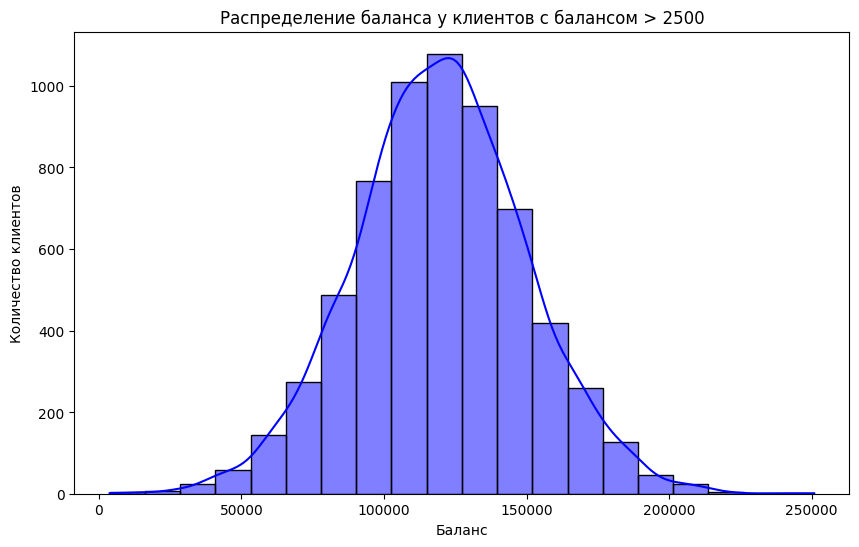

In [9]:
filtered = churn[churn['Balance'] > 2500]

plt.figure(figsize=(10, 6))
sns.histplot(filtered['Balance'], bins=20, kde=True, color='blue') # pyright: ignore[reportArgumentType]
plt.title('Распределение баланса у клиентов с балансом > 2500')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()